## Loading a pretrained model:

We'll use the functions in the 'models.py' file.

In [2]:
from model import get_model, get_device

model = get_model(2)

## Visualising the results

We'll create an instance of the `DrawMasks` class from `visual_utils.py`.

In [11]:
from visual_utils import DrawMasks
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights

visualiser = DrawMasks(model, transforms=MaskRCNN_ResNet50_FPN_Weights.DEFAULT.transforms(), device=get_device())

## Testing the model

Let's see how the model initially performs on a test image:

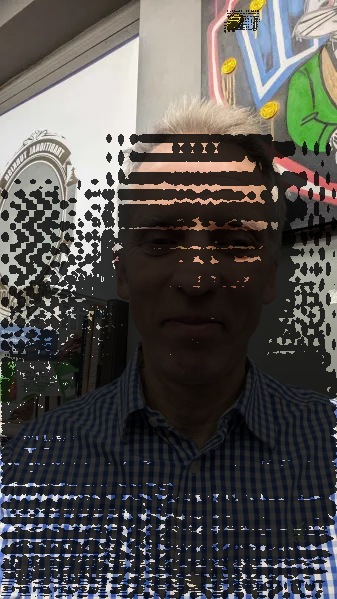

In [12]:
dave_image_path = "Datasets/test/dave_before.webp"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path)

image

Not great, so we need to fine-tune the model.

## Defining the datasets

We define a training and validation dataset, using the class `HairDataset` in `data_utils.py`.

In [13]:
from data_utils import HairDataset

folder_path = 'Datasets/hair-seg.v6i.coco-segmentation/'

train_dataset = HairDataset(folder_path + 'train', training_mode=True)
validation_dataset = HairDataset(folder_path + 'valid', training_mode=False)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


## Viewing the datasets

Here's an example of the images and masks in the dataset:

torch.Size([3, 640, 640]) torch.Size([1, 640, 640])


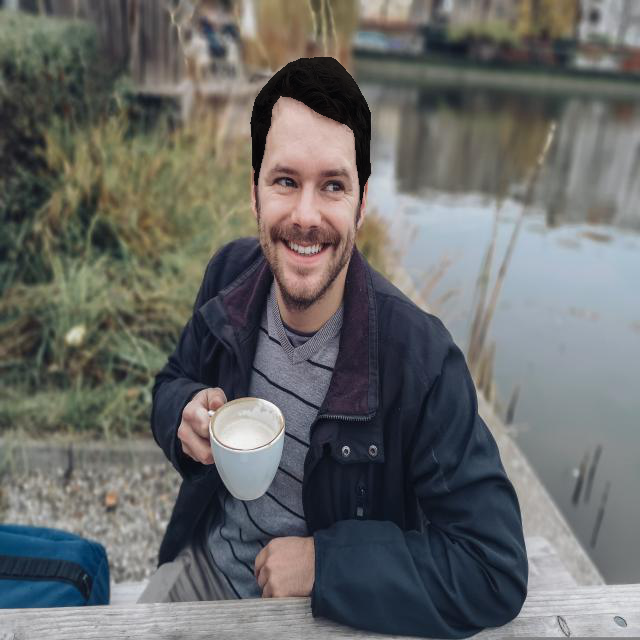

In [20]:
image, target = validation_dataset[71]

print(image.shape, target['masks'].shape)
visualiser.draw_masks_from_tensor_and_masks(image, target['masks'])

## Training the model

We create an instance of the `TrainModel` class from `training_loop.py` to train the model.

Uncomment the commented lines to train the model.

In [ ]:
from training_loop import TrainModel

training_loop = TrainModel(model, train_dataset, validation_dataset)

#training_loop.train_n_epochs(batch_size=2, num_epochs=10, initial_learning_rate=0.01)

#training_loop.save_model_parameters('app/Model_Weights.pt')

model = training_loop.get_model()

In [ ]:
import torch

state_dict = torch.load('app/Model_Weights.pt', map_location=get_device())

model.load_state_dict(state_dict)

## Testing the model after training

Let's see how the model performs after training.

In [ ]:
dave_image_path = "Datasets/test/dave_after.webp"

my_picture = "Datasets/test/photo.jpg"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path, prob_threshold=0.8)

image